### Importing necessary libraries

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from warnings import filterwarnings
filterwarnings('ignore')

### Reading and Exploring the data

In [2]:
#Reading the data
ad_data = pd.read_csv("D:/Downloads/advertising.csv") 

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Visualising the data

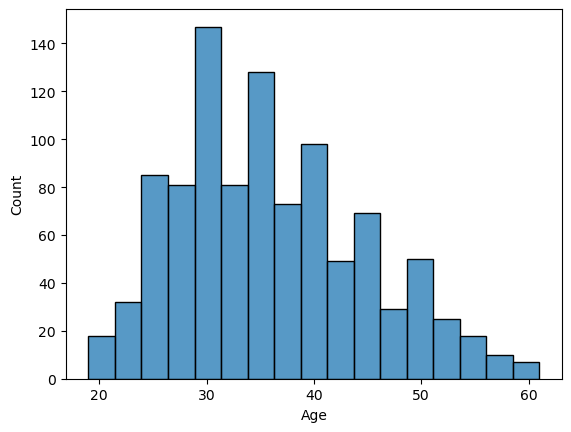

In [6]:
# Creating a histogram of the Age 
sns.histplot(data = ad_data['Age'])
plt.show()

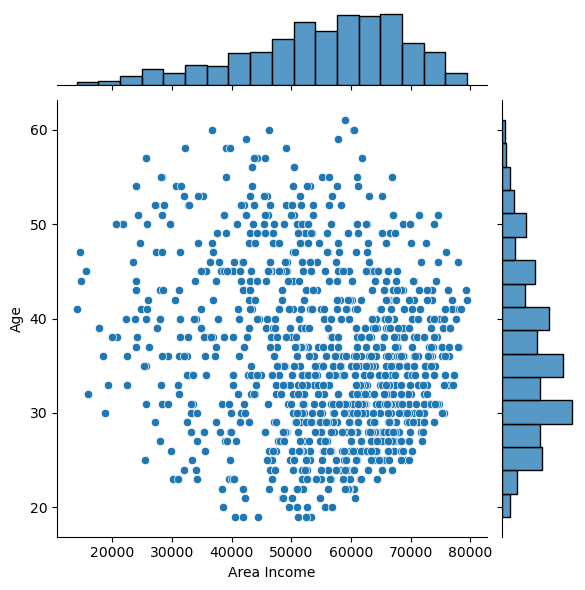

In [7]:
# Creating a jointplot showing Area Income versus Age.
sns.jointplot(x =  ad_data['Area Income'], y =  ad_data['Age'])
plt.show()

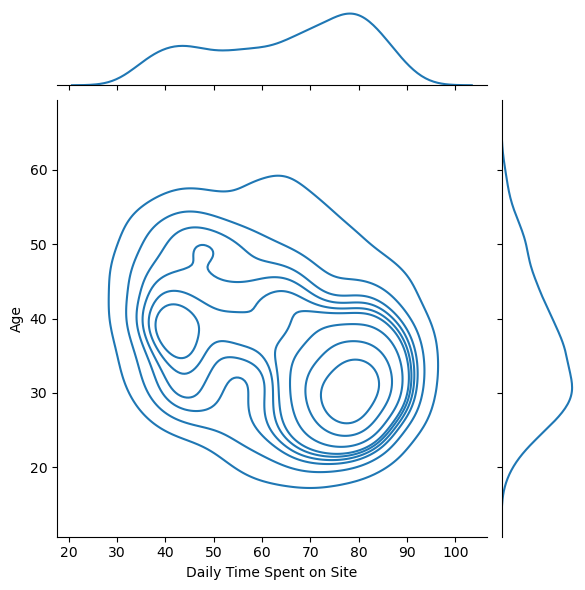

In [8]:
# Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age
sns.jointplot(data = ad_data, x =  'Daily Time Spent on Site', y =  'Age', kind = "kde")
plt.show()

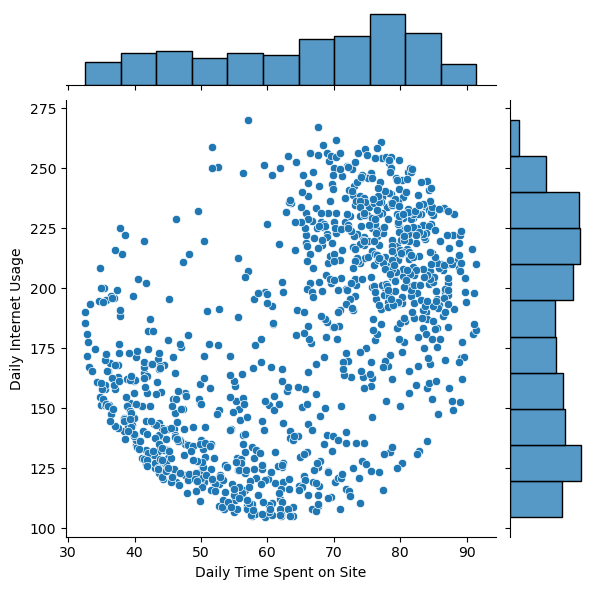

In [9]:
# Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'
sns.jointplot(x =  ad_data['Daily Time Spent on Site'], y =  ad_data['Daily Internet Usage'])
plt.show()

### Logistic Regression

**Now it's time to do a train test split, and train our model!**

In [10]:
y = ad_data['Clicked on Ad']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [11]:
ad_data.drop(columns = ['Clicked on Ad','Ad Topic Line','Timestamp','City','Country'], inplace = True)

In [12]:
x = ad_data.copy()
x.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [13]:
scaler = StandardScaler() 
x = scaler.fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [15]:
# Model
lr_model = LogisticRegression()

In [16]:
# fit
lr_model.fit(x_train, y_train)

LogisticRegression()

In [17]:
# Predict
y_pred = lr_model.predict(x_test)

In [18]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       146
           1       0.98      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



Accuracy is 97%

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[143,   3],
       [  6, 148]], dtype=int64)

<Axes: >

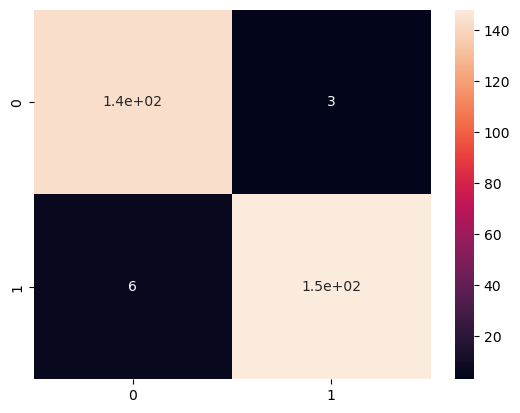

In [20]:
sns.heatmap(cm, annot = True)

In [21]:
y_test.value_counts()

1    154
0    146
Name: Clicked on Ad, dtype: int64